In [1188]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, classification_report,accuracy_score, confusion_matrix, auc

In [1189]:
train = pd.read_csv('case_train.csv')
test = pd.read_csv('case_test.csv')

In [1190]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77000 entries, 0 to 76999
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   inadimplente                           77000 non-null  int64  
 1   util_linhas_inseguras                  53181 non-null  float64
 2   idade                                  46770 non-null  float64
 3   vezes_passou_de_30_59_dias             77000 non-null  int64  
 4   razao_debito                           77000 non-null  float64
 5   salario_mensal                         25662 non-null  float64
 6   numero_linhas_crdto_aberto             77000 non-null  int64  
 7   numero_vezes_passou_90_dias            39498 non-null  float64
 8   numero_emprestimos_imobiliarios        77000 non-null  int64  
 9   numero_de_vezes_que_passou_60_89_dias  17131 non-null  float64
 10  numero_de_dependentes                  64854 non-null  float64
 11  sc

In [1191]:
train.describe()

,inadimplente,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes,score_2,score_4
count,77000.000000,53181.000000,46770.000000,77000.000000,77000.000000,25662.000000,77000.000000,39498.000000,77000.000000,17131.000000,64854.000000,77000.000000,30131.000000
mean,0.066442,6.772273,52.265427,0.418857,359.625289,6624.034097,8.438909,0.247177,1.019779,0.274707,0.757548,406.900312,500.935515
std,0.249054,315.201012,14.787977,4.218858,2331.349453,8153.270844,5.141286,3.966419,1.110459,4.555894,1.118085,232.479887,288.359625
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029332,41.000000,0.000000,0.175372,3400.000000,5.000000,0.000000,0.000000,0.000000,0.000000,208.000000,252.000000
50%,0.000000,0.152994,52.000000,0.000000,0.367070,5400.000000,8.000000,0.000000,1.000000,0.000000,0.000000,408.000000,501.000000
75%,0.000000,0.564008,63.000000,0.000000,0.869616,8268.000000,11.000000,0.000000,2.000000,0.000000,1.000000,606.000000,751.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,699530.000000,57.000000,98.000000,25.000000,98.000000,20.000000,998.000000,1000.000000


In [1192]:
train.head(10)

,inadimplente,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes,score_1,score_2,score_3,score_4
0,0,NaN,NaN,0,0.102518,NaN,3,0.0,0,NaN,NaN,f,278,g,708.0
1,0,NaN,47.0,0,0.162967,NaN,10,0.0,1,NaN,0.0,h,428,g,NaN
2,0,1.078921,26.0,0,0.017768,1800.0,1,0.0,0,NaN,0.0,q,268,b,273.0
3,0,0.553878,NaN,0,1.193871,1500.0,8,NaN,0,NaN,NaN,h,566,f,NaN
4,0,0.034962,35.0,1,3266.000000,NaN,5,0.0,1,NaN,NaN,o,81,d,255.0
5,0,0.000000,72.0,0,262.000000,NaN,1,NaN,0,NaN,1.0,v,641,g,181.0
6,0,0.871408,NaN,0,1943.000000,NaN,9,0.0,1,NaN,0.0,h,517,d,NaN
7,1,0.948112,39.0,0,0.823588,NaN,7,0.0,0,NaN,0.0,o,729,c,NaN
8,0,NaN,42.0,1,1658.000000,NaN,4,NaN,1,NaN,NaN,i,77,g,92.0
9,0,1.000000,28.0,0,0.008283,NaN,0,0.0,0,NaN,0.0,h,422,d,NaN


In [1193]:
aux = pd.DataFrame({
    'colunas': train.columns,
    'tipos': train.dtypes,
    'percentual_faltante': train.isna().sum() / train.shape[0]
}
)
aux

,colunas,tipos,percentual_faltante
inadimplente,inadimplente,int64,0.000000
util_linhas_inseguras,util_linhas_inseguras,float64,0.309338
idade,idade,float64,0.392597
vezes_passou_de_30_59_dias,vezes_passou_de_30_59_dias,int64,0.000000
razao_debito,razao_debito,float64,0.000000
salario_mensal,salario_mensal,float64,0.666727
numero_linhas_crdto_aberto,numero_linhas_crdto_aberto,int64,0.000000
numero_vezes_passou_90_dias,numero_vezes_passou_90_dias,float64,0.487039
numero_emprestimos_imobiliarios,numero_emprestimos_imobiliarios,int64,0.000000
numero_de_vezes_que_passou_60_89_dias,numero_de_vezes_que_passou_60_89_dias,float64,0.777519


In [1194]:
train['numero_vezes_passou_90_dias'].fillna(0, inplace = True)
train['numero_de_vezes_que_passou_60_89_dias'].fillna(0, inplace = True)
train['numero_de_dependentes'].fillna(0, inplace = True)
train['salario_mensal'].fillna(train.salario_mensal.mode()[0], inplace = True)
train['idade'].fillna(train.idade.mode()[0], inplace=True)
train['util_linhas_inseguras'].fillna(train.util_linhas_inseguras.median(), inplace = True)
train['score_4'].fillna(train['score_2'], inplace = True)


test['numero_vezes_passou_90_dias'].fillna(0, inplace = True)
test['numero_de_vezes_que_passou_60_89_dias'].fillna(0, inplace = True)
test['numero_de_dependentes'].fillna(0, inplace = True)
test['salario_mensal'].fillna(test.salario_mensal.mode()[0], inplace = True)
test['idade'].fillna(test.idade.mode()[0], inplace=True)
test['util_linhas_inseguras'].fillna(test.util_linhas_inseguras.median(), inplace = True)
test['score_4'].fillna(test['score_2'], inplace = True)

In [1195]:
train.corr()

,inadimplente,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes,score_2,score_4
inadimplente,1.000000,-0.002188,-0.085357,0.123579,-0.005876,-0.018312,-0.033262,0.080917,-0.012406,0.054822,0.040030,0.105761,0.056658
util_linhas_inseguras,-0.002188,1.000000,-0.002950,-0.000928,0.000355,0.001614,-0.005384,-0.000680,0.010572,-0.000438,-0.002795,-0.003885,-0.005876
idade,-0.085357,-0.002950,1.000000,-0.050758,0.012299,0.013713,0.108687,-0.037801,0.023322,-0.021201,-0.148295,-0.006184,-0.002058
vezes_passou_de_30_59_dias,0.123579,-0.000928,-0.050758,1.000000,-0.006347,-0.010527,-0.056352,0.664793,-0.032032,0.507020,-0.002209,0.022627,0.013790
razao_debito,-0.005876,0.000355,0.012299,-0.006347,1.000000,-0.022000,0.040727,-0.005244,0.112872,-0.003417,-0.036920,0.000036,-0.003655
salario_mensal,-0.018312,0.001614,0.013713,-0.010527,-0.022000,1.000000,0.096146,-0.006688,0.118011,-0.007295,0.065559,-0.005973,-0.003416
numero_linhas_crdto_aberto,-0.033262,-0.005384,0.108687,-0.056352,0.040727,0.096146,1.000000,-0.055149,0.435330,-0.036500,0.066871,-0.006096,-0.003238
numero_vezes_passou_90_dias,0.080917,-0.000680,-0.037801,0.664793,-0.005244,-0.006688,-0.055149,1.000000,-0.031955,0.305381,-0.004914,0.012832,0.009110
numero_emprestimos_imobiliarios,-0.012406,0.010572,0.023322,-0.032032,0.112872,0.118011,0.435330,-0.031955,1.000000,-0.021082,0.115765,-0.002918,-0.001017
numero_de_vezes_que_passou_60_89_dias,0.054822,-0.000438,-0.021201,0.507020,-0.003417,-0.007295,-0.036500,0.305381,-0.021082,1.000000,-0.002804,0.011667,0.013364


In [1196]:
y = train['inadimplente']

features1 = ['idade',
       'vezes_passou_de_30_59_dias',  'salario_mensal',
       'numero_linhas_crdto_aberto', 'numero_vezes_passou_90_dias',       
       'numero_de_vezes_que_passou_60_89_dias', 'numero_de_dependentes', 'score_2', 'score_4']

features = ['idade',
       'vezes_passou_de_30_59_dias',  'salario_mensal',
       'numero_linhas_crdto_aberto', 'numero_vezes_passou_90_dias',       
       'numero_de_vezes_que_passou_60_89_dias', 'numero_de_dependentes', 'score_2', 'score_4']


In [1197]:
train[features].corr()


,idade,vezes_passou_de_30_59_dias,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes,score_2,score_4
idade,1.000000,-0.050758,0.013713,0.108687,-0.037801,-0.021201,-0.148295,-0.006184,-0.002058
vezes_passou_de_30_59_dias,-0.050758,1.000000,-0.010527,-0.056352,0.664793,0.507020,-0.002209,0.022627,0.013790
salario_mensal,0.013713,-0.010527,1.000000,0.096146,-0.006688,-0.007295,0.065559,-0.005973,-0.003416
numero_linhas_crdto_aberto,0.108687,-0.056352,0.096146,1.000000,-0.055149,-0.036500,0.066871,-0.006096,-0.003238
numero_vezes_passou_90_dias,-0.037801,0.664793,-0.006688,-0.055149,1.000000,0.305381,-0.004914,0.012832,0.009110
numero_de_vezes_que_passou_60_89_dias,-0.021201,0.507020,-0.007295,-0.036500,0.305381,1.000000,-0.002804,0.011667,0.013364
numero_de_dependentes,-0.148295,-0.002209,0.065559,0.066871,-0.004914,-0.002804,1.000000,-0.001228,-0.002875
score_2,-0.006184,0.022627,-0.005973,-0.006096,0.012832,0.011667,-0.001228,1.000000,0.544831
score_4,-0.002058,0.013790,-0.003416,-0.003238,0.009110,0.013364,-0.002875,0.544831,1.000000


In [1198]:
modelo = linear_model.LogisticRegression(penalty='none', solver='newton-cg')

In [1199]:
modelo.fit(train[features], y)

c:\users\miyaz\appdata\local\programs\python\python37-32\lib\site-packages\scipy\optimize\linesearch.py:426: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\users\miyaz\appdata\local\programs\python\python37-32\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\miyaz\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [1200]:
confusion_matrix(y, modelo.predict(train[features]))

array([[71822,    62],
       [ 5042,    74]], dtype=int64)

In [1201]:
pd.crosstab(y, modelo.predict(train[features]))

col_0,0,1
inadimplente,,
0,71822,62
1,5042,74


In [1202]:
modelo.score(train[features],y)

0.9337142857142857

In [1203]:
pred = modelo.predict(test[features])

In [1204]:
test['inadimplente'] = predict.round()

In [1205]:
test.to_csv('teste.csv', index=False, header=True )

In [1206]:
acuracia = accuracy_score(y, modelo.predict(train[features]))

In [1207]:
print(classification_report(y, modelo.predict(train[features])))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97     71884
           1       0.54      0.01      0.03      5116

    accuracy                           0.93     77000
   macro avg       0.74      0.51      0.50     77000
weighted avg       0.91      0.93      0.90     77000



In [1208]:
yhat = modelo.predict_proba(train[features])

In [1209]:
yhat = yhat[:, 1]

In [1210]:
print('AUC: %0.2f' % roc_auc_score(y, yhat))

AUC: 0.67


In [1211]:
def plot_roc_curve(y_true, y_score, figsize=(10,6)):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    plt.figure(figsize=figsize)
    auc_value = roc_auc_score(y_true, y_score)
    plt.plot(fpr, tpr, color='orange', label='ROC curve (area = %0.2f)' % auc_value)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

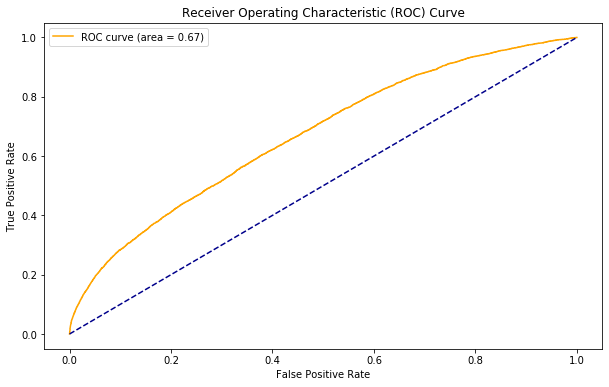

In [1212]:
plot_roc_curve(y, yhat)